In [1]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Getting Data

In [3]:
data=pd.read_csv("/content/gdrive/MyDrive/kag_risk_factors_cervical_cancer.csv",dtype='object')
data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0


# Checking if there is any null value

In [4]:
data.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [5]:
#Dropping unnecessary data
data=data.drop(['STDs: Time since first diagnosis'], axis = 1)

In [6]:
#replacing "?" with nan
data = data.replace('?', np.nan)

In [7]:
data = data.drop_duplicates()

In [8]:
data = data.apply(pd.to_numeric, errors='coerce')
data.head(13)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.000000,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.000000,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.000000,3.4,0.0,0.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.000000,0.0,1.0,2.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,1,0,1,1,0,0,0,0
9,44,3.0,15.0,NaN,1.0,1.266973,2.8,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,0,0,0,0,0,0,0,0


In [9]:
data.isnull().sum()

Age                                     0
Number of sexual partners              25
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               103
Hormonal Contraceptives (years)       103
IUD                                   112
IUD (years)                           112
STDs                                  100
STDs (number)                         100
STDs:condylomatosis                   100
STDs:cervical condylomatosis          100
STDs:vaginal condylomatosis           100
STDs:vulvo-perineal condylomatosis    100
STDs:syphilis                         100
STDs:pelvic inflammatory disease      100
STDs:genital herpes                   100
STDs:molluscum contagiosum            100
STDs:AIDS                             100
STDs:HIV                              100
STDs:Hepatitis B                  

In [10]:
# for continuous variable
data['Number of sexual partners'] = data['Number of sexual partners'].fillna(data['Number of sexual partners'].median())
data['First sexual intercourse'] = data['First sexual intercourse'].fillna(data['First sexual intercourse'].median())
data['Num of pregnancies'] = data['Num of pregnancies'].fillna(data['Num of pregnancies'].median())
data['Smokes'] = data['Smokes'].fillna(1)
data['Smokes (years)'] = data['Smokes (years)'].fillna(data['Smokes (years)'].median())
data['Smokes (packs/year)'] = data['Smokes (packs/year)'].fillna(data['Smokes (packs/year)'].median())
data['Hormonal Contraceptives'] = data['Hormonal Contraceptives'].fillna(1)
data['Hormonal Contraceptives (years)'] = data['Hormonal Contraceptives (years)'].fillna(data['Hormonal Contraceptives (years)'].median())
data['IUD'] = data['IUD'].fillna(0) # Under suggestion
data['IUD (years)'] = data['IUD (years)'].fillna(0) #Under suggestion
data['STDs'] = data['STDs'].fillna(1)
data['STDs (number)'] = data['STDs (number)'].fillna(data['STDs (number)'].median())
data['STDs:condylomatosis'] = data['STDs:condylomatosis'].fillna(data['STDs:condylomatosis'].median())
data['STDs:cervical condylomatosis'] = data['STDs:cervical condylomatosis'].fillna(data['STDs:cervical condylomatosis'].median())
data['STDs:vaginal condylomatosis'] = data['STDs:vaginal condylomatosis'].fillna(data['STDs:vaginal condylomatosis'].median())
data['STDs:vulvo-perineal condylomatosis'] = data['STDs:vulvo-perineal condylomatosis'].fillna(data['STDs:vulvo-perineal condylomatosis'].median())
data['STDs:syphilis'] = data['STDs:syphilis'].fillna(data['STDs:syphilis'].median())
data['STDs:pelvic inflammatory disease'] = data['STDs:pelvic inflammatory disease'].fillna(data['STDs:pelvic inflammatory disease'].median())
data['STDs:genital herpes'] = data['STDs:genital herpes'].fillna(data['STDs:genital herpes'].median())
data['STDs:molluscum contagiosum'] = data['STDs:molluscum contagiosum'].fillna(data['STDs:molluscum contagiosum'].median())
data['STDs:AIDS'] = data['STDs:AIDS'].fillna(data['STDs:AIDS'].median())
data['STDs:HIV'] = data['STDs:HIV'].fillna(data['STDs:HIV'].median())
data['STDs:Hepatitis B'] = data['STDs:Hepatitis B'].fillna(data['STDs:Hepatitis B'].median())
data['STDs:HPV'] = data['STDs:HPV'].fillna(data['STDs:HPV'].median())


In [11]:
#for categorical data
data = pd.get_dummies(data=data, columns=['Smokes','Hormonal Contraceptives','IUD','STDs',
                                      'Dx:Cancer','Dx:CIN','Dx:HPV','Dx','Hinselmann','Citology','Schiller'])

In [12]:
data.isnull().sum()

Age                                     0
Number of sexual partners               0
First sexual intercourse                0
Num of pregnancies                      0
Smokes (years)                          0
Smokes (packs/year)                     0
Hormonal Contraceptives (years)         0
IUD (years)                             0
STDs (number)                           0
STDs:condylomatosis                     0
STDs:cervical condylomatosis            0
STDs:vaginal condylomatosis             0
STDs:vulvo-perineal condylomatosis      0
STDs:syphilis                           0
STDs:pelvic inflammatory disease        0
STDs:genital herpes                     0
STDs:molluscum contagiosum              0
STDs:AIDS                               0
STDs:HIV                                0
STDs:Hepatitis B                        0
STDs:HPV                                0
STDs: Number of diagnosis               0
STDs: Time since last diagnosis       764
Biopsy                            

# Data Exploration

In [13]:
data.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)',
       'STDs:condylomatosis', 'STDs:cervical condylomatosis',
       'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
       'STDs:syphilis', 'STDs:pelvic inflammatory disease',
       'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS',
       'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since last diagnosis', 'Biopsy', 'Smokes_0.0', 'Smokes_1.0',
       'Hormonal Contraceptives_0.0', 'Hormonal Contraceptives_1.0', 'IUD_0.0',
       'IUD_1.0', 'STDs_0.0', 'STDs_1.0', 'Dx:Cancer_0', 'Dx:Cancer_1',
       'Dx:CIN_0', 'Dx:CIN_1', 'Dx:HPV_0', 'Dx:HPV_1', 'Dx_0', 'Dx_1',
       'Hinselmann_0', 'Hinselmann_1', 'Citology_0', 'Citology_1',
       'Schiller_0', 'Schiller_1'],
      dtype='object')

In [14]:
# 0 means not cancer affected and 1 means cancer affected cell

data['Biopsy'].value_counts()

0    781
1     54
Name: Biopsy, dtype: int64

In [15]:
data['Number of sexual partners'].value_counts()

2.0     291
3.0     207
1.0     193
4.0      76
5.0      44
6.0       9
7.0       7
8.0       4
9.0       1
28.0      1
10.0      1
15.0      1
Name: Number of sexual partners, dtype: int64

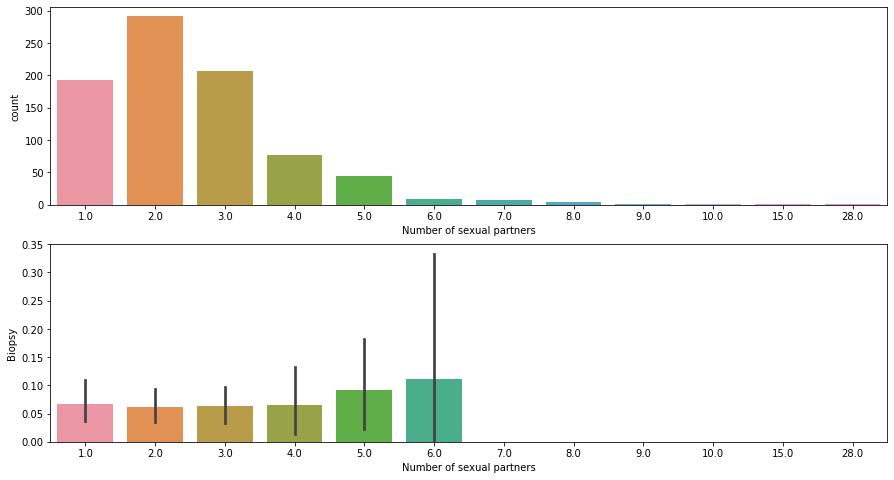

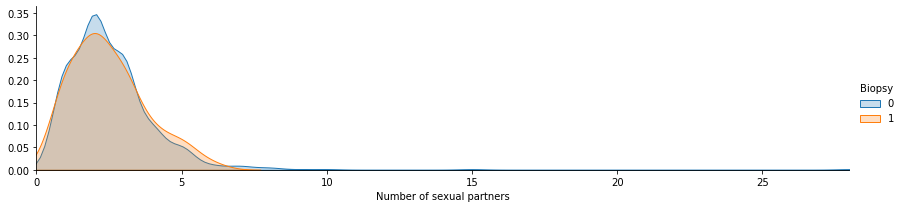

In [16]:
# Biopsy vs no. of sexual partners

#categorical to categorical
fig, (ax1,ax2) = plt.subplots(2, 1, figsize = (15, 8))
sns.countplot(x = 'Number of sexual partners', data = data, ax=ax1)
sns.barplot(x = 'Number of sexual partners', y = 'Biopsy', data = data, ax=ax2) 

#continuous to categorical
facet = sns.FacetGrid(data, hue='Biopsy',aspect=4)
facet.map(sns.kdeplot,'Number of sexual partners',shade= True)
facet.set(xlim=(0, data['Number of sexual partners'].max()))
facet.add_legend()

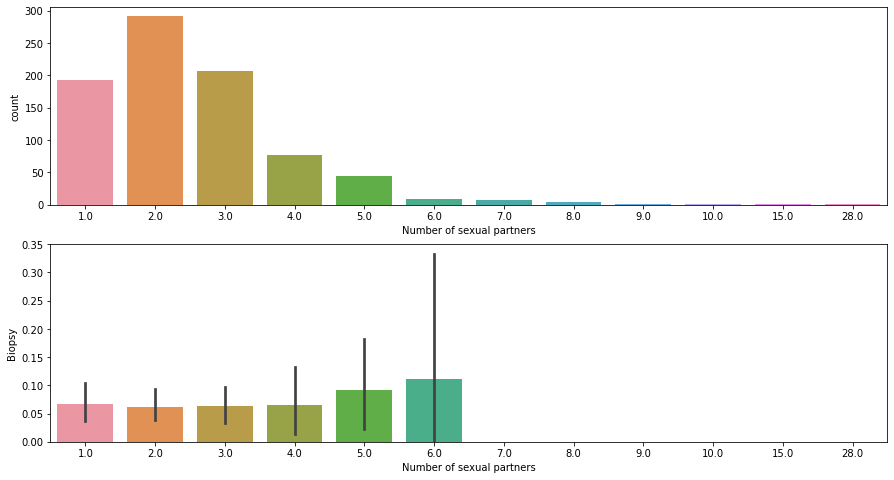

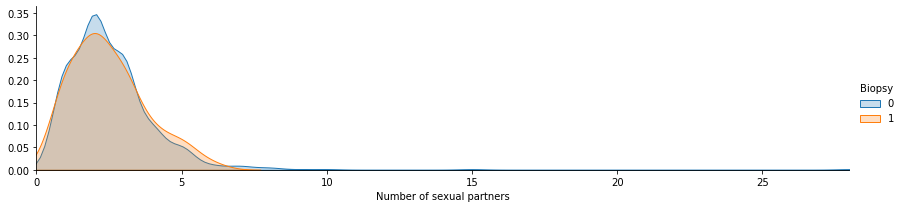

In [17]:
# Biopsy vs no. of sexual partners

#categorical to categorical
fig, (ax1,ax2) = plt.subplots(2, 1, figsize = (15, 8))
sns.countplot(x = 'Number of sexual partners', data = data, ax=ax1)
sns.barplot(x = 'Number of sexual partners', y = 'Biopsy', data = data, ax=ax2) 

#continuous to categorical
facet = sns.FacetGrid(data, hue='Biopsy',aspect=4)
facet.map(sns.kdeplot,'Number of sexual partners',shade= True)
facet.set(xlim=(0, data['Number of sexual partners'].max()))
facet.add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


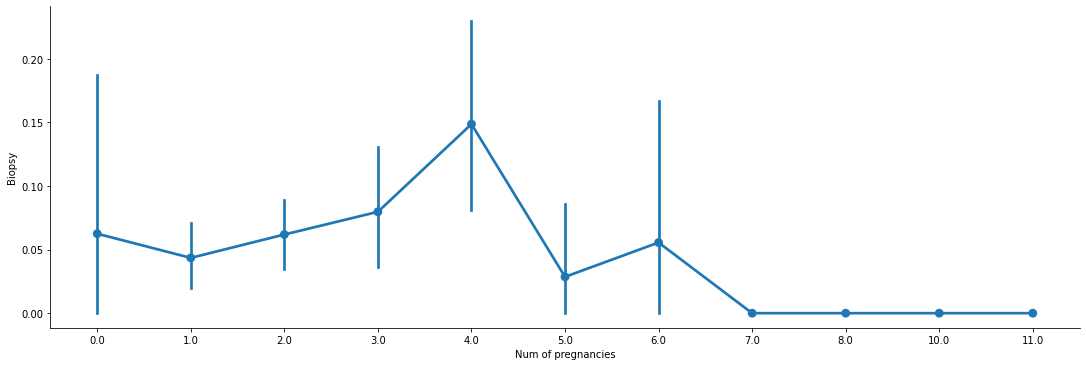

In [18]:
# biopsy vs no. of pregnancies

sns.factorplot('Num of pregnancies','Biopsy',data = data, size=5, aspect=3)

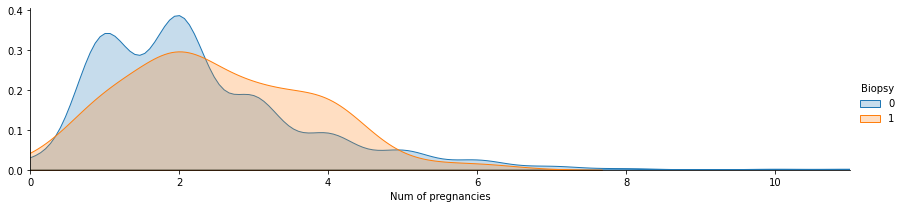

In [19]:
#continuous to categorical
facet = sns.FacetGrid(data, hue='Biopsy', aspect=4)
facet.map(sns.kdeplot,'Num of pregnancies', shade= True)
facet.set(xlim=(0, data['Num of pregnancies'].max()))
facet.add_legend()

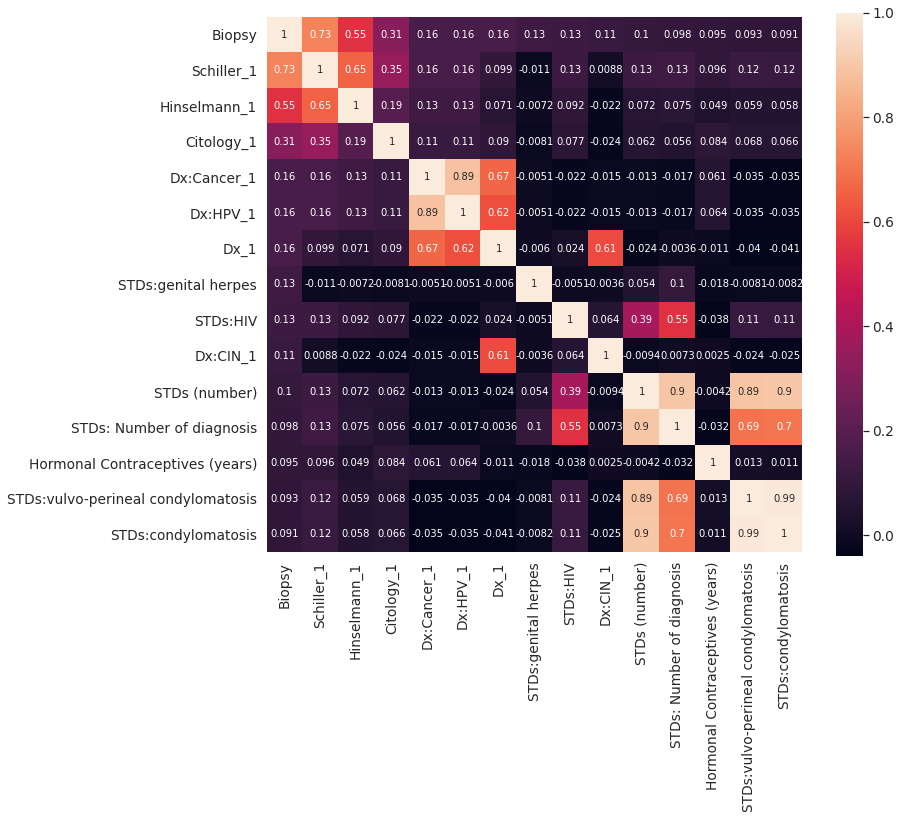

In [22]:
# list the heatmap of top correlation

corr = data.corr()

# number of variables for heatmap
k = 15

cols = corr.nlargest(k, 'Biopsy')['Biopsy'].index
cm = np.corrcoef(data[cols].values.T)

plt.figure(figsize=(12, 10))

sns.set(font_scale=1.25)
sns.heatmap(cm, cbar = True, annot = True, square = True, annot_kws = {'size': 10},
                 yticklabels = cols.values, xticklabels = cols.values)
plt.show()

In [23]:
data.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since last diagnosis,Biopsy,Smokes_0.0,Smokes_1.0,Hormonal Contraceptives_0.0,Hormonal Contraceptives_1.0,IUD_0.0,IUD_1.0,STDs_0.0,STDs_1.0,Dx:Cancer_0,Dx:Cancer_1,Dx:CIN_0,Dx:CIN_1,Dx:HPV_0,Dx:HPV_1,Dx_0,Dx_1,Hinselmann_0,Hinselmann_1,Citology_0,Citology_1,Schiller_0,Schiller_1
count,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.00000,835.000000,835.000000,835.0,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.0,835.000000,835.000000,835.000000,835.000000,71.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000
mean,27.023952,2.535329,17.020359,2.283832,1.234329,0.458571,2.080520,0.45685,0.159281,0.052695,0.0,0.004790,0.051497,0.021557,0.001198,0.001198,0.001198,0.0,0.021557,0.001198,0.002395,0.089820,5.816901,0.064671,0.837126,0.162874,0.305389,0.694611,0.900599,0.099401,0.785629,0.214371,0.978443,0.021557,0.989222,0.010778,0.978443,0.021557,0.971257,0.028743,0.958084,0.041916,0.948503,0.051497,0.912575,0.087425
std,8.482986,1.654044,2.805154,1.408152,4.111264,2.239363,3.601364,1.83754,0.536236,0.223557,0.0,0.069088,0.221142,0.145319,0.034606,0.034606,0.034606,0.0,0.145319,0.034606,0.048912,0.306335,5.755271,0.246091,0.369472,0.369472,0.460848,0.460848,0.299379,0.299379,0.410631,0.410631,0.145319,0.145319,0.103320,0.103320,0.145319,0.145319,0.167182,0.167182,0.200518,0.200518,0.221142,0.221142,0.282626,0.282626
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,26.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.500000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,3.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,7.500000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,37.000000,37.000000,30.000000,19.00000,4.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,3.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 835 entries, 0 to 857
Data columns (total 46 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 835 non-null    int64  
 1   Number of sexual partners           835 non-null    float64
 2   First sexual intercourse            835 non-null    float64
 3   Num of pregnancies                  835 non-null    float64
 4   Smokes (years)                      835 non-null    float64
 5   Smokes (packs/year)                 835 non-null    float64
 6   Hormonal Contraceptives (years)     835 non-null    float64
 7   IUD (years)                         835 non-null    float64
 8   STDs (number)                       835 non-null    float64
 9   STDs:condylomatosis                 835 non-null    float64
 10  STDs:cervical condylomatosis        835 non-null    float64
 11  STDs:vaginal condylomatosis         835 non-n

In [25]:
data.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since last diagnosis,Biopsy,Smokes_0.0,Smokes_1.0,Hormonal Contraceptives_0.0,Hormonal Contraceptives_1.0,IUD_0.0,IUD_1.0,STDs_0.0,STDs_1.0,Dx:Cancer_0,Dx:Cancer_1,Dx:CIN_0,Dx:CIN_1,Dx:HPV_0,Dx:HPV_1,Dx_0,Dx_1,Hinselmann_0,Hinselmann_1,Citology_0,Citology_1,Schiller_0,Schiller_1
count,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.00000,835.000000,835.000000,835.0,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.0,835.000000,835.000000,835.000000,835.000000,71.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000
mean,27.023952,2.535329,17.020359,2.283832,1.234329,0.458571,2.080520,0.45685,0.159281,0.052695,0.0,0.004790,0.051497,0.021557,0.001198,0.001198,0.001198,0.0,0.021557,0.001198,0.002395,0.089820,5.816901,0.064671,0.837126,0.162874,0.305389,0.694611,0.900599,0.099401,0.785629,0.214371,0.978443,0.021557,0.989222,0.010778,0.978443,0.021557,0.971257,0.028743,0.958084,0.041916,0.948503,0.051497,0.912575,0.087425
std,8.482986,1.654044,2.805154,1.408152,4.111264,2.239363,3.601364,1.83754,0.536236,0.223557,0.0,0.069088,0.221142,0.145319,0.034606,0.034606,0.034606,0.0,0.145319,0.034606,0.048912,0.306335,5.755271,0.246091,0.369472,0.369472,0.460848,0.460848,0.299379,0.299379,0.410631,0.410631,0.145319,0.145319,0.103320,0.103320,0.145319,0.145319,0.167182,0.167182,0.200518,0.200518,0.221142,0.221142,0.282626,0.282626
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,26.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.500000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,3.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,7.500000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,37.000000,37.000000,30.000000,19.00000,4.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,3.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0

In [26]:
data.head(75)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since last diagnosis,Biopsy,Smokes_0.0,Smokes_1.0,Hormonal Contraceptives_0.0,Hormonal Contraceptives_1.0,IUD_0.0,IUD_1.0,STDs_0.0,STDs_1.0,Dx:Cancer_0,Dx:Cancer_1,Dx:CIN_0,Dx:CIN_1,Dx:HPV_0,Dx:HPV_1,Dx_0,Dx_1,Hinselmann_0,Hinselmann_1,Citology_0,Citology_1,Schiller_0,Schiller_1
0,18,4.0,15.0,1.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
1,15,1.0,14.0,1.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
2,34,1.0,17.0,1.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
3,52,5.0,16.0,4.0,37.0,37.00,3.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,0,0,1,0,1,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0
4,46,3.0,21.0,4.0,0.0,0.00,15.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,34,2.0,17.0,3.0,0.0,0.00,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0
72,34,2.0,21.0,2.0,0.0,0.00,0.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
73,35,2.0,20.0,2.0,0.0,0.00,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
74,35,2.0,17.0,2.0,15.0,0.32,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,0,0,1,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [27]:
x = data.iloc[:,:46]
y = data.iloc[:,45]

print(x.shape)
print(y.shape)

(835, 46)
(835,)


In [29]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [30]:
corr_features = correlation(data, 0.7)
len(set(corr_features))

18

In [31]:
corr_features # Selected features

{'Citology_1',
 'Dx:CIN_1',
 'Dx:Cancer_1',
 'Dx:HPV_0',
 'Dx:HPV_1',
 'Dx_1',
 'Hinselmann_1',
 'Hormonal Contraceptives_1.0',
 'IUD_0.0',
 'IUD_1.0',
 'STDs: Number of diagnosis',
 'STDs:condylomatosis',
 'STDs:vulvo-perineal condylomatosis',
 'STDs_1.0',
 'Schiller_0',
 'Schiller_1',
 'Smokes (packs/year)',
 'Smokes_1.0'}

In [32]:
y = np.array(data['Biopsy'])
x = data.drop(['Age','Number of sexual partners','First sexual intercourse','Num of pregnancies',
               'Smokes (years)','Smokes_0.0','Hormonal Contraceptives (years)','IUD (years)','STDs (number)',
               'STDs:cervical condylomatosis','STDs:vaginal condylomatosis','STDs:syphilis','STDs:pelvic inflammatory disease',
               'STDs:genital herpes','STDs:molluscum contagiosum','STDs:AIDS','STDs:HIV','STDs:Hepatitis B','STDs:HPV',
               'STDs: Time since last diagnosis','Smokes_0.0','Hormonal Contraceptives_0.0',
               'STDs_0.0','Dx:Cancer_0','Dx:CIN_0','Dx_0','Hinselmann_0','Citology_0'], axis = 1 ).iloc[:]
               

# Traning & Test Dataset

In [33]:
# splitting the dataset into  training and test set

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 45)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(501, 19)
(501,)
(334, 19)
(334,)


In [34]:
# MinMaxScaling

from sklearn.preprocessing import MinMaxScaler

# creating a minmax scaler
mm = MinMaxScaler()

# feeding the independent data into the scaler
x_train = mm.fit_transform(x_train)
x_test = mm.fit_transform(x_test)

# Applying machine learning algorithms

# Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# creating the model
lr_clf = LogisticRegression()

# feeding the training data into the model
lr_clf.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# Calculating the accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix 
print(confusion_matrix(y_test, y_pred))

Training accuracy : 0.9960079840319361
Testing accuracy : 0.9940119760479041
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       313
           1       1.00      0.90      0.95        21

    accuracy                           0.99       334
   macro avg       1.00      0.95      0.97       334
weighted avg       0.99      0.99      0.99       334

[[313   0]
 [  2  19]]


# Logistic Regression using Hyperparameter Tuning 

In [61]:
from sklearn.model_selection import GridSearchCV

params = {"C": np.logspace(-4, 4, 20),
          "solver": ["liblinear"]}

lr_clf = LogisticRegression()

lr_cv = GridSearchCV(lr_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5, iid=True)
lr_cv.fit(x_train, y_train)
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")
lr_clf = LogisticRegression(**best_params)

lr_clf.fit(x_train, y_train)

# predicting the test set results
y_pred =lr_clf.predict(x_test)

# Calculating the accuracies
print("Training accuracy :", lr_clf.score(x_train, y_train))
print("Testing accuracy :", lr_clf.score(x_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix 
print(confusion_matrix(y_test, y_pred))


import pickle
file='cervical_tuned_LR.pkl'
with open(file,'wb') as f:
    pickle.dump(lr_clf,f)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Best parameters: {'C': 4.281332398719396, 'solver': 'liblinear'}
Training accuracy : 1.0
Testing accuracy : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       313
           1       1.00      1.00      1.00        21

    accuracy                           1.00       334
   macro avg       1.00      1.00      1.00       334
weighted avg       1.00      1.00      1.00       334

[[313   0]
 [  0  21]]


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


# Support Vector Classifier

In [63]:
from sklearn.svm import SVC

# creating the model
svm_clf = SVC()

# feeding the training data into the model
svm_clf.fit(x_train, y_train)

# predicting the test set results
y_pred = svm_clf.predict(x_test)

# Calculating the accuracies
print("Training accuracy :", svm_clf.score(x_train, y_train))
print("Testing accuracy :", svm_clf.score(x_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix 
print(confusion_matrix(y_test, y_pred))

Training accuracy : 1.0
Testing accuracy : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       313
           1       1.00      1.00      1.00        21

    accuracy                           1.00       334
   macro avg       1.00      1.00      1.00       334
weighted avg       1.00      1.00      1.00       334

[[313   0]
 [  0  21]]


In [64]:
import pickle
file='cervical_tuned_SVC.pkl'
with open(file,'wb') as f:
    pickle.dump(svm_clf,f)

# Random Forest Classifier

In [65]:
from sklearn.ensemble import RandomForestClassifier

# creating the model
rf_clf = RandomForestClassifier()

# feeding the training data into the model
rf_clf.fit(x_train, y_train)

# predicting the test set results
y_pred = rf_clf.predict(x_test)

# Calculating the accuracies
print("Training accuracy :", rf_clf.score(x_train, y_train))
print("Testing accuracy :", rf_clf.score(x_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix 
print(confusion_matrix(y_test, y_pred))

Training accuracy : 1.0
Testing accuracy : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       313
           1       1.00      1.00      1.00        21

    accuracy                           1.00       334
   macro avg       1.00      1.00      1.00       334
weighted avg       1.00      1.00      1.00       334

[[313   0]
 [  0  21]]


In [66]:
import pickle
file='cervical_tuned_RF.pkl'
with open(file,'wb') as f:
    pickle.dump(rf_clf,f)

# AdaBoost Classifier

In [67]:
from sklearn.ensemble import AdaBoostClassifier

# creating the model
adb_clf = AdaBoostClassifier()

# feeding the training data into the model
adb_clf.fit(x_train, y_train)

# predicting the test set results
y_pred = adb_clf.predict(x_test)

# Calculating the accuracies
print("Training accuracy :", adb_clf.score(x_train, y_train))
print("Testing accuracy :", adb_clf.score(x_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix 
print(confusion_matrix(y_test, y_pred))


Training accuracy : 1.0
Testing accuracy : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       313
           1       1.00      1.00      1.00        21

    accuracy                           1.00       334
   macro avg       1.00      1.00      1.00       334
weighted avg       1.00      1.00      1.00       334

[[313   0]
 [  0  21]]


In [68]:
import pickle
file='cervical_tuned_ADB.pkl'
with open(file,'wb') as f:
    pickle.dump(adb_clf,f)

In [69]:
test_score = accuracy_score(y_test, lr_clf.predict(x_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(x_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

test_score = accuracy_score(y_test, svm_clf.predict(x_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(x_train)) * 100

df=pd.DataFrame(data=[["Support Vector Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(df, ignore_index=True)

test_score = accuracy_score(y_test, rf_clf.predict(x_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(x_train)) * 100

df=pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(df, ignore_index=True)

test_score = accuracy_score(y_test, adb_clf.predict(x_test)) * 100
train_score = accuracy_score(y_train, adb_clf.predict(x_train)) * 100

df=pd.DataFrame(data=[["AdaBoost Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(df, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,100.0,100.0
1,Support Vector Classifier,100.0,100.0
2,Random Forest Classifier,100.0,100.0
3,AdaBoost Classifier,100.0,100.0
